ASSIGNMENT-1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mtest=pd.read_csv('/content/drive/MyDrive/assignmentsfor3sessions.zip (Unzipped Files)/Mobiletest.csv')

In [ ]:
mtest.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [ ]:

X = mtest.drop('battery_power', axis=1)
y = mtest['battery_power']

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.nunique(), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 721)               46865     
                                                                 
Total params: 52,369
Trainable params: 52,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 4s 42ms/step - loss: 6.6055 - accuracy: 0.0025 - val_loss: 6.6420 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 12ms/step - loss: 6.4072 - accuracy: 0.0213 - val_loss: 6.7777 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 6.1321 - accuracy: 0.0300 - val_loss: 7.1555 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 5.7369 - accuracy: 0.0162 - val_loss: 7.7114 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 16ms/step - loss: 5.2805 - accuracy: 0.0288 - val_loss: 8.2877 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 16ms/step - loss: 4.7601 - accuracy: 0.0838 - val_loss: 8.9383 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 4.1635 - accuracy: 0.2100 - val_loss: 9.7060 - val_accurac

In [ ]:
new_mobile_features = [4, 2000, 1, 2.0, 1, 8, 1, 32, 0.8, 145, 4, 1000, 700, 4096, 5, 3, 12, 1, 1, 1]

In [ ]:
import numpy as np


new_mobile_features = [4, 2000, 1, 2.0, 1, 8, 1, 32, 0.8, 145, 4, 1000, 700, 4096, 5, 3, 12, 1, 1, 1]


new_mobile_features_scaled = scaler.transform([new_mobile_features])

prediction = model.predict(new_mobile_features_scaled)
predicted_ram_category = label_encoder.inverse_transform([np.argmax(prediction)])
print('Predicted Battery power Category:', predicted_ram_category)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 211ms/step
Predicted Battery power Category: [805]


In [ ]:

mtest.dropna(inplace=True)

In [ ]:
mtest.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mtest[['ram','int_memory']],mtest.id,test_size=0.2, random_state=25)

In [ ]:
X_train_scaled = X_train.copy()
X_train_scaled['ram'] = X_train_scaled['ram'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['ram'] = X_test_scaled['ram'] / 100

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: -27968.3145 - accuracy: 0.0012
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: -28668.9570 - accuracy: 0.0012
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: -29370.6992 - accuracy: 0.0012
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: -30065.3047 - accuracy: 0.0012
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: -30763.2578 - accuracy: 0.0012
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: -31458.3652 - accuracy: 0.0012
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: -32158.7695 - accuracy: 0.0012
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: -32842.1211 - accuracy: 0.0012
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: -33543.3125 - accuracy: 0.0012
Epoch 10/50
25/25 [==============================] - 0s 7ms/step - loss: 

In [ ]:
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 0s 4ms/step - loss: -58583.4531 - accuracy: 0.0000e+00


[-58583.453125, 0.0]

In [ ]:
model.predict(X_test_scaled)

7/7 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
y_test

688    689
49      50
288    289
698    699
775    776
      ... 
410    411
344    345
135    136
735    736
591    592
Name: id, Length: 200, dtype: int64

In [ ]:
coef, intercept = model.get_weights()

In [ ]:
coef, intercept

(array([[2.238091],
        [2.236822]], dtype=float32),
 array([1.244033], dtype=float32))

In [ ]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [ ]:
X_test

ram  int_memory
688  2310          12
49   2693          29
288  1335          37
698  2262          61
775  1435           2
..    ...         ...
410   600          64
344  3238          44
135  1500          10
735  1435          32
591  3131          38

[200 rows x 2 columns]

In [ ]:
def prediction_function(ram, int_memory):
    weighted_sum = coef[0]*ram + coef[1]*int_memory + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.9893633677673849

In [ ]:
prediction_function(.18, 1)

0.9798404442178765

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [ ]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['ram'],X['int_memory'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

    def predict(self, X_test):
        weighted_sum = self.w1*X_test['ram'] + self.w2*X_test['int_memory'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, ram,int_memory, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(ram)
        for i in range(epochs):
            weighted_sum = w1 * ram + w2 *int_memory + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)

            w1d = (1/n)*np.dot(np.transpose(ram),(y_predicted-y_true))
            w2d = (1/n)*np.dot(np.transpose(int_memory),(y_predicted-y_true))

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [ ]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:5314.311406730108, w2:8500.752505383338, bias:251.3831268256511, loss:-16397.73791296137
Epoch:0, w1:5314.311406730108, w2:8500.752505383338, bias:251.3831268256511, loss:-16397.73791296137
Final weights and bias: w1: 5314.311406730108, w2: 8500.752505383338, bias: 251.3831268256511


In [ ]:
coef, intercept

(array([[2.238091],
        [2.236822]], dtype=float32),
 array([1.244033], dtype=float32))

In [ ]:
X_test_scaled

ram  int_memory
688  23.10          12
49   26.93          29
288  13.35          37
698  22.62          61
775  14.35           2
..     ...         ...
410   6.00          64
344  32.38          44
135  15.00          10
735  14.35          32
591  31.31          38

[200 rows x 2 columns]

In [ ]:
customModel.predict(X_test_scaled)

688    1.0
49     1.0
288    1.0
698    1.0
775    1.0
      ... 
410    1.0
344    1.0
135    1.0
735    1.0
591    1.0
Length: 200, dtype: float64

In [ ]:
model.predict(X_test_scaled)

7/7 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 2ms/step - loss: -2325932.0000 - accuracy: 0.0000e+00
Test accuracy: 0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/assignmentsfor3sessions.zip (Unzipped Files)/Mobiletrain.csv")

In [ ]:
X_label = train_dataset.iloc[:, :20]
Y_labels = train_dataset.iloc[:, 20]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_label, Y_labels, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=15, activation='sigmoid'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dense(units=4, activation='softmax'))  # Assuming 4 price ranges/categories

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=70, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/70
32/32 [==============================] - 1s 9ms/step - loss: 1.4262 - accuracy: 0.2425 - val_loss: 1.3892 - val_accuracy: 0.2800
Epoch 2/70
32/32 [==============================] - 0s 4ms/step - loss: 1.3911 - accuracy: 0.2600 - val_loss: 1.3774 - val_accuracy: 0.2425
Epoch 3/70
32/32 [==============================] - 0s 4ms/step - loss: 1.3748 - accuracy: 0.2931 - val_loss: 1.3605 - val_accuracy: 0.3350
Epoch 4/70
32/32 [==============================] - 0s 4ms/step - loss: 1.3507 - accuracy: 0.4544 - val_loss: 1.3258 - val_accuracy: 0.5475
Epoch 5/70
32/32 [==============================] - 0s 4ms/step - loss: 1.3009 - accuracy: 0.5481 - val_loss: 1.2512 - val_accuracy: 0.6000
Epoch 6/70
32/32 [==============================] - 0s 4ms/step - loss: 1.2083 - accuracy: 0.5638 - val_loss: 1.1400 - val_accuracy: 0.6250
Epoch 7/70
32/32 [==============================] - 0s 4ms/step - loss: 1.1088 - accuracy: 0.6031 - val_loss: 1.0514 - val_accuracy: 0.7425
Epoch 8/70
32/32 [==

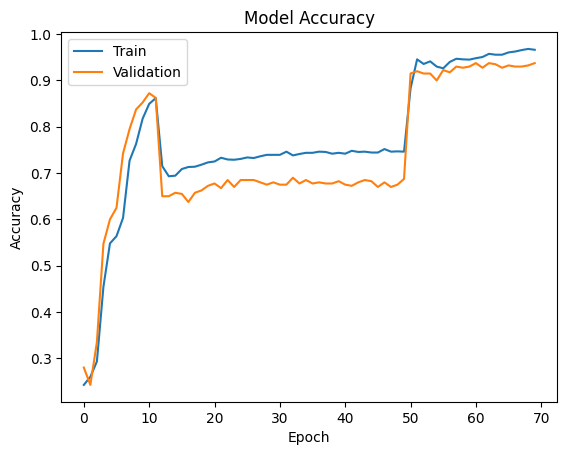

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

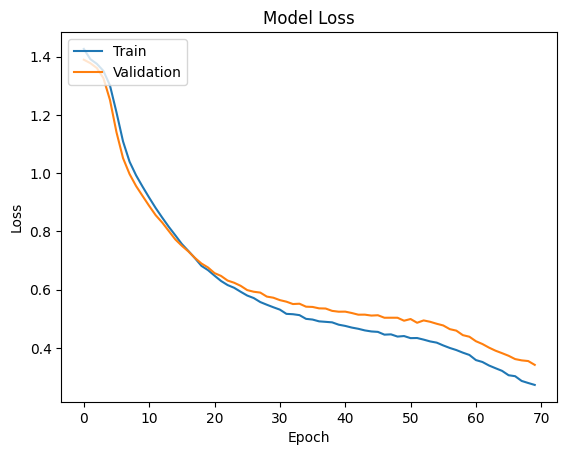

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

ASSIGNMENT 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.5993 - accuracy: 0.7924 - val_loss: 0.4660 - val_accuracy: 0.8314
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4219 - accuracy: 0.8513 - val_loss: 0.4040 - val_accuracy: 0.8549
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3804 - accuracy: 0.8637 - val_loss: 0.3845 - val_accuracy: 0.8634
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3560 - accuracy: 0.8713 - val_loss: 0.3992 - val_accuracy: 0.8544
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3406 - accuracy: 0.8767 - val_loss: 0.3596 - val_accuracy: 0.8698
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3233 - accuracy: 0.8831 - val_loss: 0.3557 - val_accuracy: 0.8725
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3141 - accuracy: 0.8846 - val_loss: 0.3481 - val_accuracy: 0.8771
Epoch 

In [ ]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8782
Test accuracy: 0.8781999945640564


In [ ]:

from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


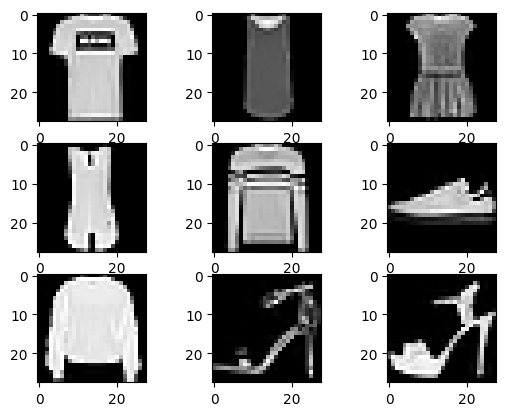

In [ ]:
for i in range(1, 10):

	plt.subplot(3, 3, i)

	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))


plt.show()

In [ ]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)

(60000, 28, 28, 1)


In [ ]:
def model_arch():
	models = Sequential()


	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))


	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))


	models.add(Flatten())
	models.add(Dense(256, activation="relu"))


	models.add(Dense(10, activation="softmax"))
	return models

In [ ]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)       

In [ ]:
model.save_weights('./model.h5', overwrite=True)

1/1 [==============================] - 0s 152ms/step
t_shirt


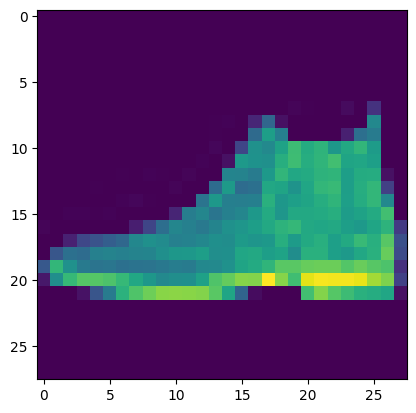

In [ ]:

labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
		'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()

ASSIGNMENT 3

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
pg=pd.read_csv('/content/drive/MyDrive/assignmentsfor3sessions.zip (Unzipped Files)/penguins.csv')

In [ ]:
pg.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [ ]:
pg.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [ ]:

pg.dropna(inplace=True)

In [ ]:

features = ['Flipper Length (mm)', 'Beak Length (mm)', 'Beak Width (mm)', 'Body Mass (g)']
target = 'Species'

In [ ]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'


actual_features = pg.columns[3:7]
if not set(features).issubset(actual_features):
    raise ValueError("Invalid feature names provided")

X = pg[features]
y = pg[target]

In [ ]:

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(features),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
17/17 [==============================] - 1s 17ms/step - loss: 99.2876 - accuracy: 0.3910 - val_loss: 5.4674 - val_accuracy: 0.2687
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 15.3772 - accuracy: 0.3233 - val_loss: 4.8014 - val_accuracy: 0.4627
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 5.9008 - accuracy: 0.3835 - val_loss: 1.9864 - val_accuracy: 0.2687
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 2.4192 - accuracy: 0.4023 - val_loss: 4.1142 - val_accuracy: 0.4030
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 5.6152 - accuracy: 0.3722 - val_loss: 1.6094 - val_accuracy: 0.2687
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 9.3706 - accuracy: 0.4624 - val_loss: 7.1848 - val_accuracy: 0.2687
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 2.9454 - accuracy: 0.4925 - val_loss: 1.4161 - val_accuracy: 0.6119
Epoch 8/50
17/17 

In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 8ms/step - loss: 2.5896 - accuracy: 0.3433
Test accuracy: 0.34328359365463257


ASSIGNMENT 4

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/heart.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 3ms/step - loss: 0.8462 - accuracy: 0.3017
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.7767 - accuracy: 0.3223
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.7240 - accuracy: 0.4132
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5248
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6488
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.6942
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.7149
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7438
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7645
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.7645
Epoch 11/50
8/8 [======================

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.4118 - accuracy: 0.8689
Accuracy: 0.868852436542511
